<a href="https://colab.research.google.com/github/faisu6339-glitch/Machine-learning/blob/main/Gradient_Descent(Part2_ADV).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [331]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [332]:
X,y=make_regression(n_samples=100,n_features=1,noise=20,n_informative=1,n_targets=1)

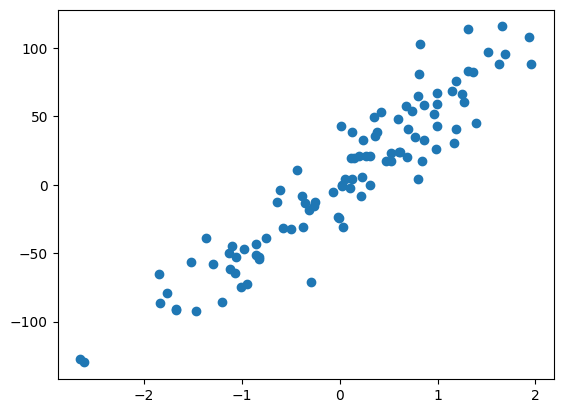

In [333]:
plt.scatter(X,y)
plt.show()

In [334]:
lr=LinearRegression()
lr.fit(X,y)

LinearRegression()

In [335]:
print(lr.coef_)
print(lr.intercept_)

[52.32328266]
2.790214638770888


In [336]:
m=29.19

In [337]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin

class GDRegressor():

  def __init__(self,learning_rate,epochs):
     self.m=29.9
     self.b=-120
     self.lr=learning_rate
     self.epochs=epochs

  def fit(self,X,y):

    #Calculate  the b using GD
    for i in range(self.epochs):
      loss_slope=-2*np.sum(y-self.m*X.ravel()-self.b)
      self.b=self.b-(self.lr* loss_slope)
      print(loss_slope,self.b)
    print(self.b)




This `GDRegressor` class implements a simple Gradient Descent algorithm for linear regression. Let's break down its components:

*   **`__init__(self, learning_rate, epochs)`**:
    *   This is the constructor method, called when you create an instance of `GDRegressor`.
    *   `self.m = 29.9`: Initializes the slope (`m`) of the linear model to a fixed value. In a typical gradient descent, `m` would also be updated, but here it's kept constant.
    *   `self.b = -120`: Initializes the intercept (`b`) of the linear model. This is the parameter that the gradient descent will try to optimize.
    *   `self.lr = learning_rate`: Stores the learning rate, which controls the step size during the optimization process. A higher learning rate can lead to faster convergence but risks overshooting, while a smaller one can be slow but more precise.
    *   `self.epochs = epochs`: Stores the number of iterations (epochs) the gradient descent algorithm will run.

*   **`fit(self, X, y)`**:
    *   This method performs the training of the model using gradient descent.
    *   `for i in range(self.epochs)`: This loop iterates for the specified number of epochs.
    *   `loss_slope = -2 * np.sum(y - self.m * X.ravel() - self.b)`: This calculates the gradient (slope) of the Mean Squared Error (MSE) loss function with respect to the intercept `b`. The formula for MSE is `(1/N) * sum((y_true - y_pred)^2)`, and its derivative with respect to `b` (when `m` is fixed) is `-2 * (1/N) * sum(y_true - (m*X + b))`. Here, the `(1/N)` term is omitted, effectively scaling the learning rate.
    *   `self.b = self.b - (self.lr * loss_slope)`: This is the core gradient descent update rule for the intercept `b`. It adjusts `b` in the direction opposite to the `loss_slope`, scaled by the `learning_rate`.
    *   `print(loss_slope, self.b)`: Inside the loop, this prints the current `loss_slope` and the updated `b` value for each epoch, allowing you to observe the training progress.
    *   `print(self.b)`: After all epochs are completed, this prints the final optimized `b` value.

In [338]:
gd = GDRegressor(0.01, 10)
gd.fit(X, y)



-24826.197304474026 128.26197304474027
24826.197304474023 -119.99999999999997
-24826.197304474023 128.26197304474027
24826.197304474023 -119.99999999999997
-24826.197304474023 128.26197304474027
24826.197304474023 -119.99999999999997
-24826.197304474023 128.26197304474027
24826.197304474023 -119.99999999999997
-24826.197304474023 128.26197304474027
24826.197304474023 -119.99999999999997
-119.99999999999997


#Visualizing the changes

In [339]:
import numpy as np

class GDRegressorX:

    def __init__(self, learning_rate, epochs):
        self.m = 29.19
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs

        # 👇 for visualization
        self.b_history = []
        self.loss_history = []

    def fit(self, X, y):
        X = X.ravel()

        for i in range(self.epochs):
            y_pred = self.m * X + self.b

            # loss (MSE)
            loss = np.mean((y - y_pred) ** 2)

            # gradient w.r.t b
            db = -2 * np.mean(y - y_pred)

            # update
            self.b -= self.lr * db

            # store history
            self.b_history.append(self.b)
            self.loss_history.append(loss)

        return self


This `GDRegressor` class is an improved version, specifically designed to track the changes in the intercept (`b`) and the Mean Squared Error (MSE) loss during training, which is useful for visualization. Here's a breakdown:

*   **`__init__(self, learning_rate, epochs)`**:
    *   `self.m = 29.19` and `self.b = -120`: Initializes the slope (`m`) and intercept (`b`) respectively. In this version, `m` is still fixed, and `b` is the parameter to be optimized.
    *   `self.lr = learning_rate` and `self.epochs = epochs`: Store the learning rate and the number of training iterations.
    *   `self.b_history = []` and `self.loss_history = []`: These are new attributes introduced to store the value of `b` and the calculated `loss` at each epoch. This allows for plotting their trajectories later.

*   **`fit(self, X, y)`**:
    *   `X = X.ravel()`: Ensures `X` is a 1D array for consistent calculations.
    *   The `for` loop iterates for the specified `epochs`.
    *   `y_pred = self.m * X + self.b`: Calculates the predicted `y` values based on the current `m` and `b`.
    *   `loss = np.mean((y - y_pred) ** 2)`: Calculates the Mean Squared Error (MSE) for the current predictions. This is the loss function we are trying to minimize.
    *   `db = -2 * np.mean(y - y_pred)`: Calculates the gradient of the MSE with respect to the intercept `b`. This tells us the direction and magnitude to adjust `b` to reduce the loss.
    *   `self.b -= self.lr * db`: Updates the intercept `b` by taking a step in the negative direction of the gradient, scaled by the `learning_rate`.
    *   `self.b_history.append(self.b)` and `self.loss_history.append(loss)`: Store the updated `b` and the current `loss` in their respective history lists after each epoch.

In [340]:
gdX = GDRegressorX(learning_rate=0.01, epochs=50)
gdX.fit(X, y)

print("m:", gdX.m)
print("b:", gdX.b)


m: 29.19
b: -41.046761871666455


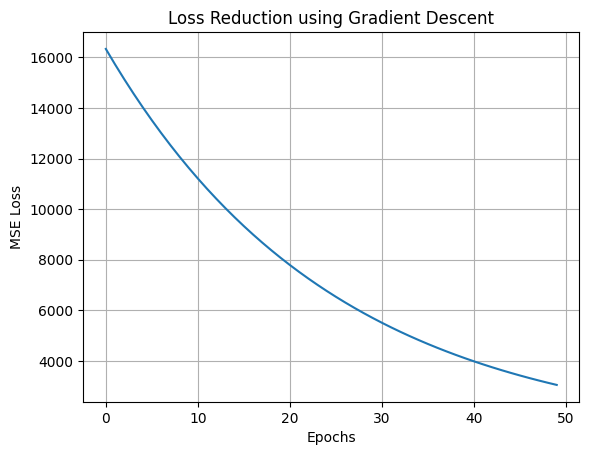

In [341]:
import matplotlib.pyplot as plt

plt.plot(gdX.loss_history)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Loss Reduction using Gradient Descent")
plt.grid()
plt.show()


In [342]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin

class GDRegressor1(BaseEstimator, RegressorMixin):

    def __init__(self, learning_rate, epochs):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        X = X.ravel()
        self.m = 29.19
        self.b = -120

        for _ in range(self.epochs):
            y_pred = self.m * X + self.b
            db = -2 * np.mean(y - y_pred)
            self.b -= self.learning_rate * db

        return self   # REQUIRED

    def predict(self, X):
        return self.m * X.ravel() + self.b

In [343]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin

class GDRegressor2(BaseEstimator, RegressorMixin):

    def __init__(self, learning_rate, epochs):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        X = X.ravel()
        self.m = 29.19
        self.b = -120

        for _ in range(self.epochs):
            y_pred = self.m * X + self.b

            db = -2 * np.mean(y - y_pred)
            dm = -2 * np.mean((y - y_pred) * X)

            self.b -= self.learning_rate * db
            self.m -= self.learning_rate * dm

        return self

    def predict(self, X):
        return self.m * X.ravel() + self.b


In [344]:
gd1=GDRegressor1(0.01,10)

In [345]:
gd1.fit(X_train,y_train)

GDRegressor1(epochs=10, learning_rate=0.01)

In [346]:
print(f"Learned coefficient (m): {gd1.m:.4f}")
print(f"Learned intercept (b): {gd1.b:.4f}")

Learned coefficient (m): 29.1900
Learned intercept (b): -97.1297


In [347]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [348]:
from sklearn.model_selection import cross_val_score

np.mean(
    cross_val_score(
        GDRegressor1(0.01,10),
        X,
        y,
        scoring='r2',
        cv=5
    )
)


np.float64(-2.8816650969448694)

In [349]:
gd2=GDRegressor2(0.01,10)

In [350]:
gd2.fit(X,y)

GDRegressor2(epochs=10, learning_rate=0.01)

In [351]:
gd2.fit(X_train,y_train)

GDRegressor2(epochs=10, learning_rate=0.01)

In [352]:
print(f"Learned coefficient (m): {gd2.m:.4f}")
print(f"Learned intercept (b): {gd2.b:.4f}")

Learned coefficient (m): 34.1541
Learned intercept (b): -97.6376


In [353]:
np.mean(
    cross_val_score(
        GDRegressor2(0.01, 10),
        X,
        y,
        scoring='r2',
        cv=5
    )
)


np.float64(-2.793295691868166)

In [354]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin # Import necessary base classes

class GDRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, learning_rate=0.001, epochs=100):
        self.m = 29.19 # Initial value for slope
        self.b = -120  # Initial value for intercept
        self.lr = learning_rate
        self.epochs = epochs

        # history for visualization
        self.b_history = []
        self.loss_history = []
        self.m_history = [] # Track m history

        # For compatibility with scikit-learn
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        X = X.ravel() # Ensure X is 1D for calculations

        for i in range(self.epochs):
            y_pred = self.m * X + self.b

            # loss (MSE)
            loss = np.mean((y - y_pred) ** 2)
            self.loss_history.append(loss)
            self.b_history.append(self.b)
            self.m_history.append(self.m)

            # gradients
            grad_b = -2 * np.mean(y - y_pred)
            grad_m = -2 * np.mean((y - y_pred) * X)

            # update
            self.b = self.b - self.lr * grad_b
            self.m = self.m - self.lr * grad_m

            # print(f"Epoch {i}: b={self.b:.2f}, m={self.m:.2f}, loss={loss:.2f}") # Uncomment to see progress

        self.coef_ = np.array([self.m])
        self.intercept_ = self.b
        # print(f"Final b={self.b:.2f}, Final m={self.m:.2f}") # Uncomment to see final values
        return self # Return self for scikit-learn compatibility

    def predict(self, X):
        if self.coef_ is None or self.intercept_ is None:
            raise RuntimeError("Model has not been fitted yet.")
        return self.coef_[0] * X.ravel() + self.intercept_

    def get_params(self, deep=True):
        return {"learning_rate": self.lr, "epochs": self.epochs}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self


In [355]:
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])


In [356]:
model = GDRegressor(learning_rate=0.01, epochs=30)
model.fit(X, y)
print("m:", gd.m)
print("b:", gd.b)


m: 29.9
b: -119.99999999999997


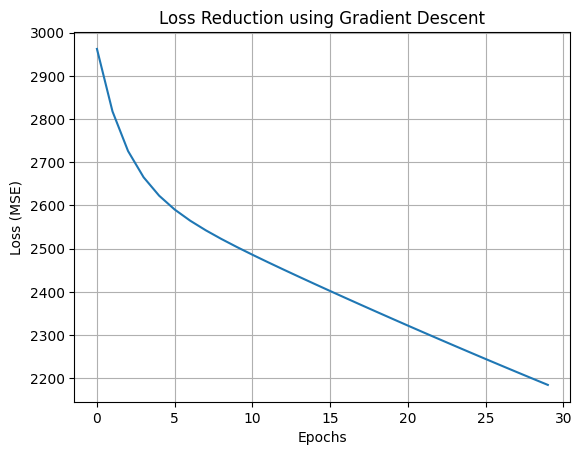

In [357]:
import matplotlib.pyplot as plt

plt.plot(model.loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Loss Reduction using Gradient Descent")
plt.grid()
plt.show()


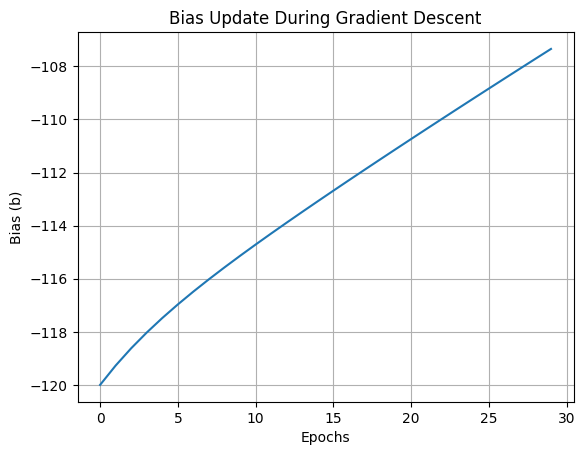

In [358]:
plt.plot(model.b_history)
plt.xlabel("Epochs")
plt.ylabel("Bias (b)")
plt.title("Bias Update During Gradient Descent")
plt.grid()
plt.show()


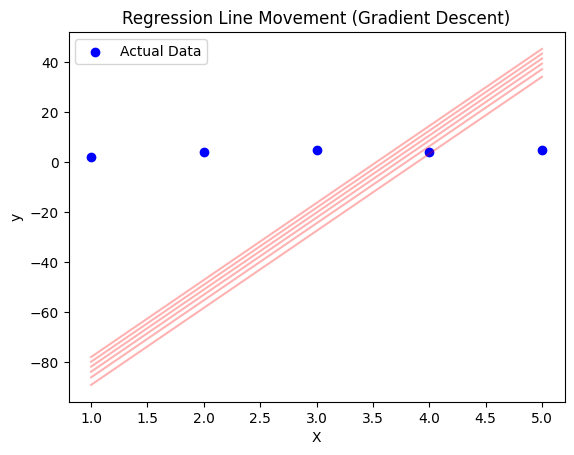

In [359]:
plt.scatter(X, y, color="blue", label="Actual Data")

for i in range(0, len(model.b_history), 5):
    y_line = model.m * X + model.b_history[i]
    plt.plot(X, y_line, alpha=0.3, color="red")

plt.xlabel("X")
plt.ylabel("y")
plt.title("Regression Line Movement (Gradient Descent)")
plt.legend()
plt.show()


#Gradient Descent Regressor

In [360]:
import numpy as np

class GDRegressorLearn:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        X = X.ravel()
        n = len(X)

        # start neutral
        self.m = 0.0
        self.b = 0.0

        # history for learning
        self.loss_history = []
        self.m_history = []
        self.b_history = []

        for _ in range(self.epochs):
            y_pred = self.m * X + self.b

            # loss
            loss = np.mean((y - y_pred) ** 2)
            self.loss_history.append(loss)
            self.m_history.append(self.m)
            self.b_history.append(self.b)

            # gradients (MEAN, not SUM)
            dm = -2 * np.mean(X * (y - y_pred))
            db = -2 * np.mean(y - y_pred)

            # update
            self.m -= self.learning_rate * dm
            self.b -= self.learning_rate * db

        return self

    def predict(self, X):
        return self.m * X.ravel() + self.b


🔹 Operation 1: Visualize Loss Curve (MOST IMPORTANT)

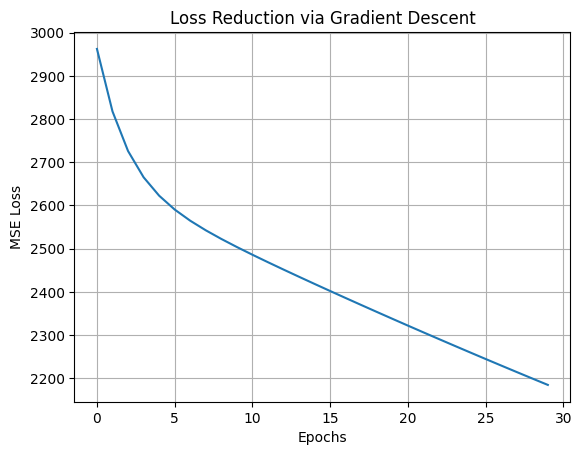

In [361]:
import matplotlib.pyplot as plt

plt.plot(model.loss_history)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Loss Reduction via Gradient Descent")
plt.grid()
plt.show()


🔹 Operation 2: Learning Rate Experiment (MANDATORY)

In [362]:
lr = 0.1     # diverges
lr = 0.01    # good
lr = 0.0001  # slow


🔹 Operation 3: Parameter Trajectory (m & b)

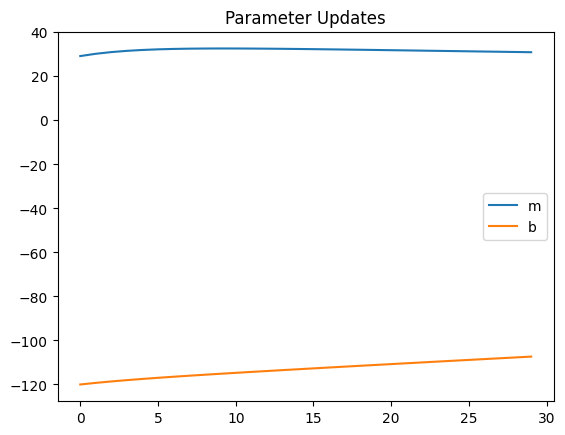

In [363]:
plt.plot(model.m_history, label="m")
plt.plot(model.b_history, label="b")
plt.legend()
plt.title("Parameter Updates")
plt.show()


🔹 Operation 4: Regression Line Movement

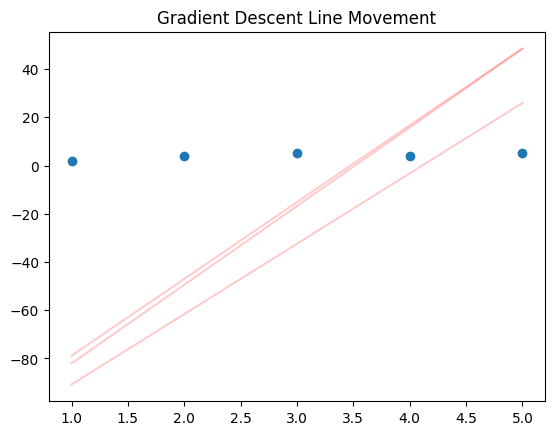

In [364]:
plt.scatter(X, y)

for i in range(0, len(model.m_history), 10):
    y_line = model.m_history[i]*X + model.b_history[i]
    plt.plot(X, y_line, color="red", alpha=0.2)

plt.title("Gradient Descent Line Movement")
plt.show()


# Task
The `gd1.fit` method is currently failing because `X_train` and `y_train` are not defined. To fix this, I will modify cell `994424cb` to include the `train_test_split` call before fitting `gd1`. Then, I will execute the modified cell to fit `gd1`.

## modify_cell_994424cb

### Subtask:
Modify cell 994424cb to include the `train_test_split` call before fitting `gd1` to ensure `X_train` and `y_train` are defined.


**Reasoning**:
To address the `NameError` and fulfill the subtask, I will modify cell `994424cb` by first splitting the data into training and testing sets using `train_test_split` and then fitting the `gd1` model with the training data within the same cell.



In [365]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gd1.fit(X_train, y_train)

print("m:", gd.m)
print("b:", gd.b)

m: 29.9
b: -119.99999999999997
